In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [26]:
model_to_n_param = {
    "ResNet18": 11_689_512/1e6,
    "ResNet34": 21_797_672/1e6,
    "SmallAlexNet": 26_800_000/1e6,
    "VGG": 132_863_336/1e6,
}

In [2]:
project = 'rehersal Models CIFAR10 Task IL'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'learning_rate', 'epochs', 'architecture'], y_min=30)

In [3]:
viz.extract_all_runs_metrics_after_task_3(task=4.9)

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(model_to_n_param[df[df['UID'] == uid]['architecture'].iloc[0]])

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    labels = [f"{uid.split(';')[0]} {uid.split(';')[4]}" for uid in UIDS]
    # labels = [f"{model_to_n_param[uid.split(';')[4]]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

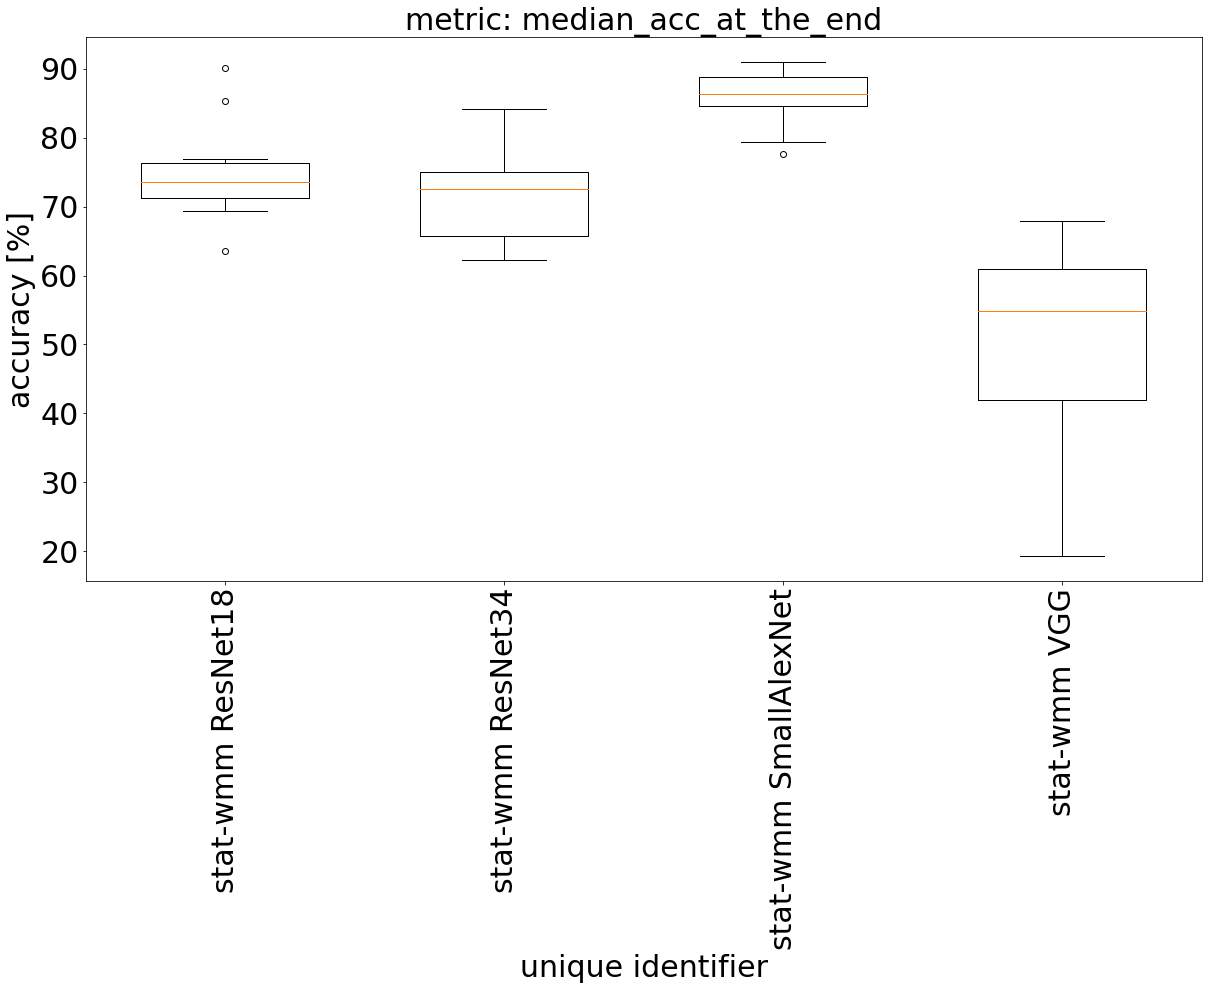

In [32]:
df = viz.metrics_df.copy()
df = df[df['rehearsal_dataset']=='stat-wmm']

metric = 'median_acc_at_the_end'


box_plot(metric, df, f"model_{metric}", 30)


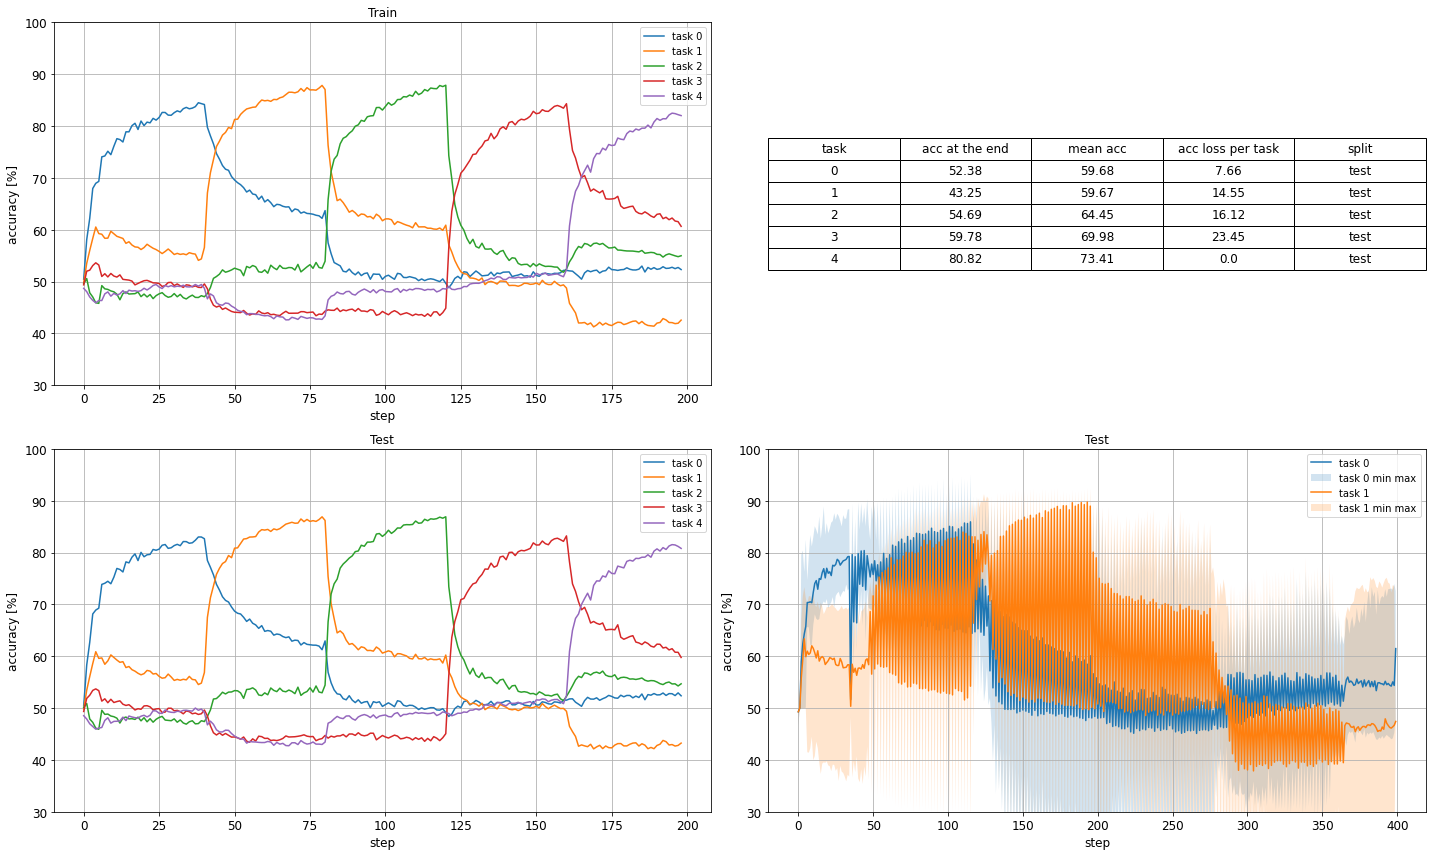

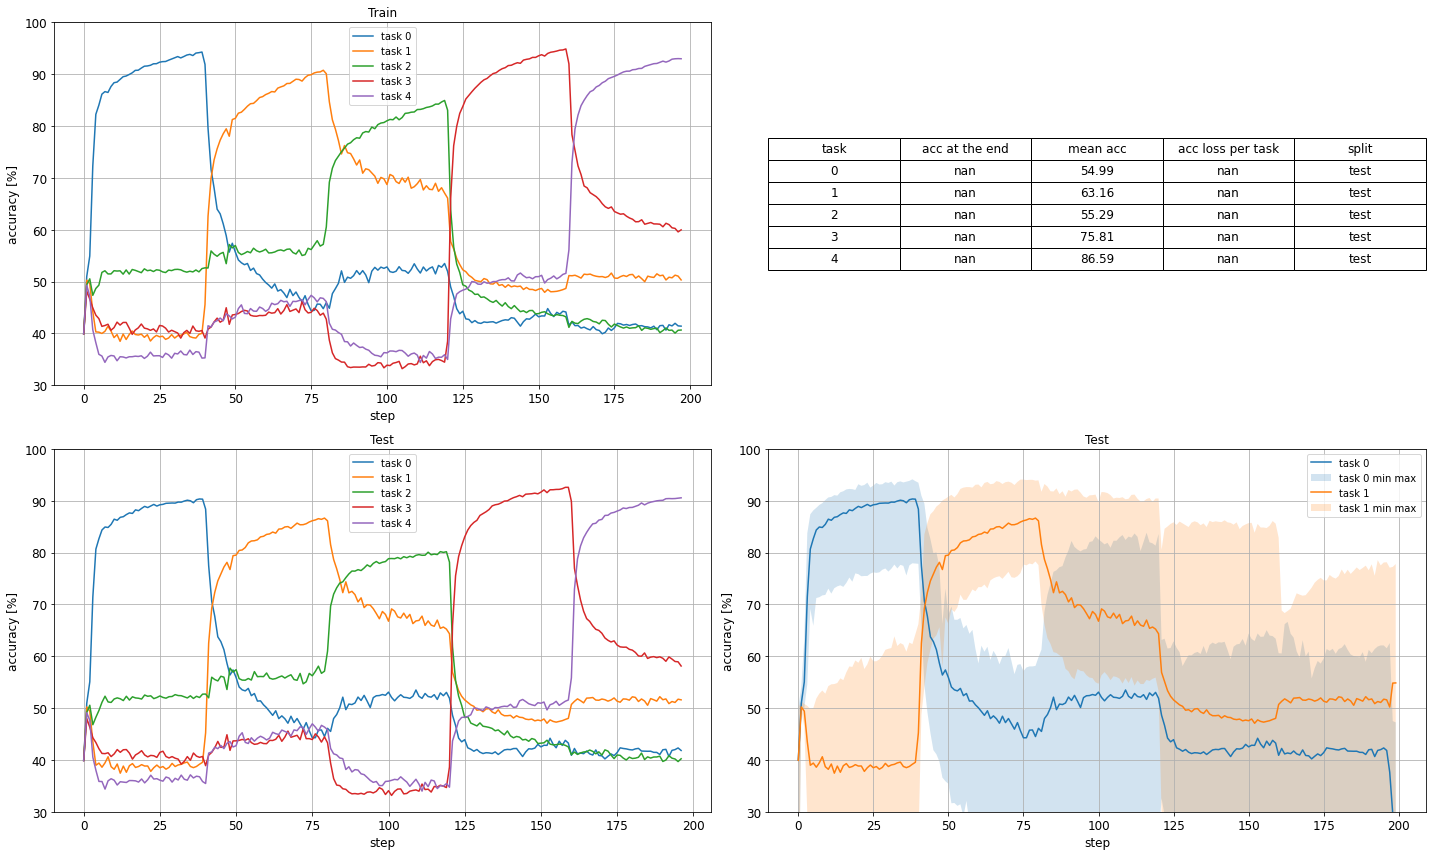

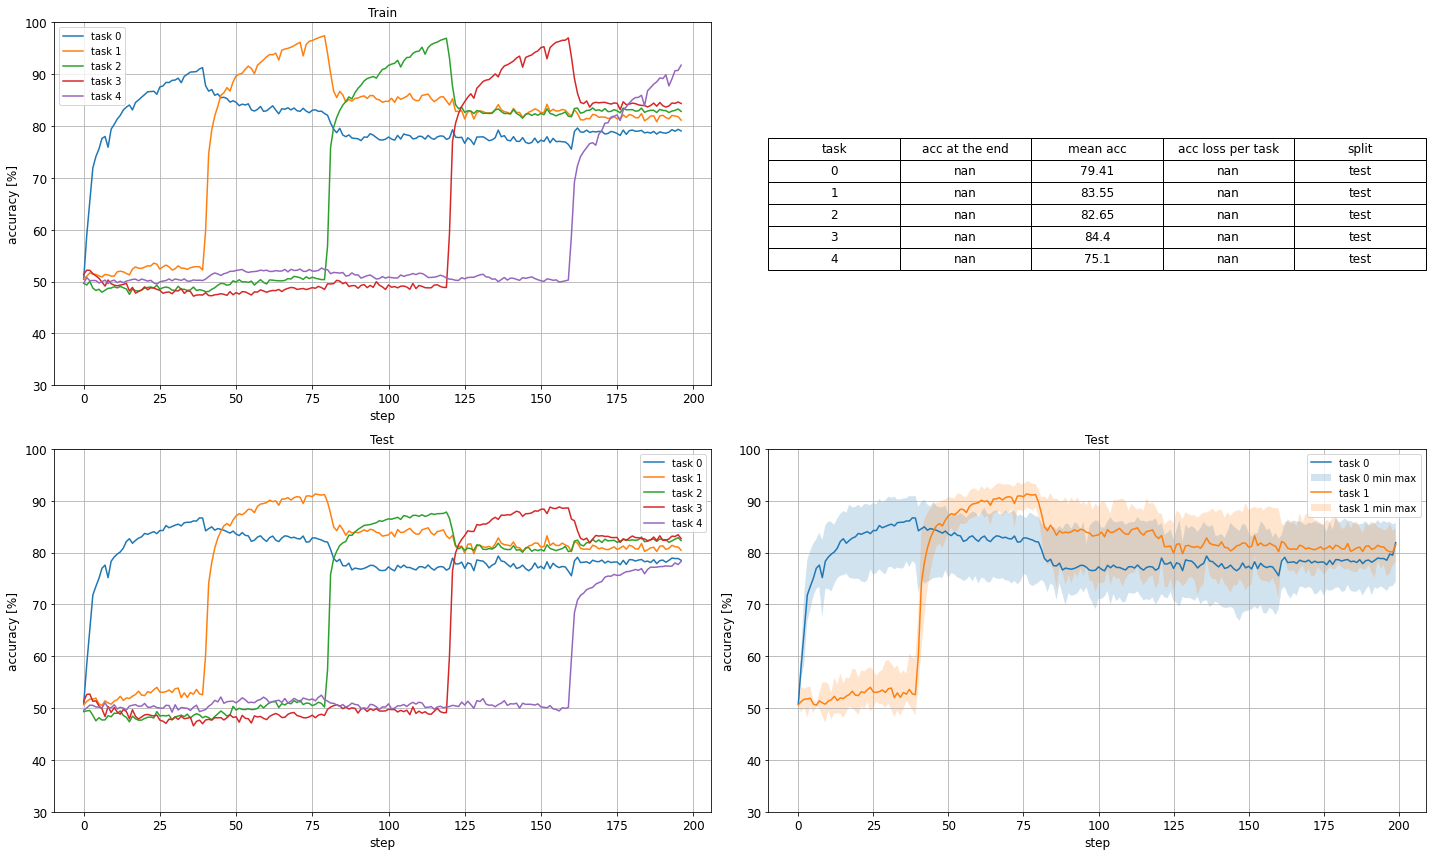

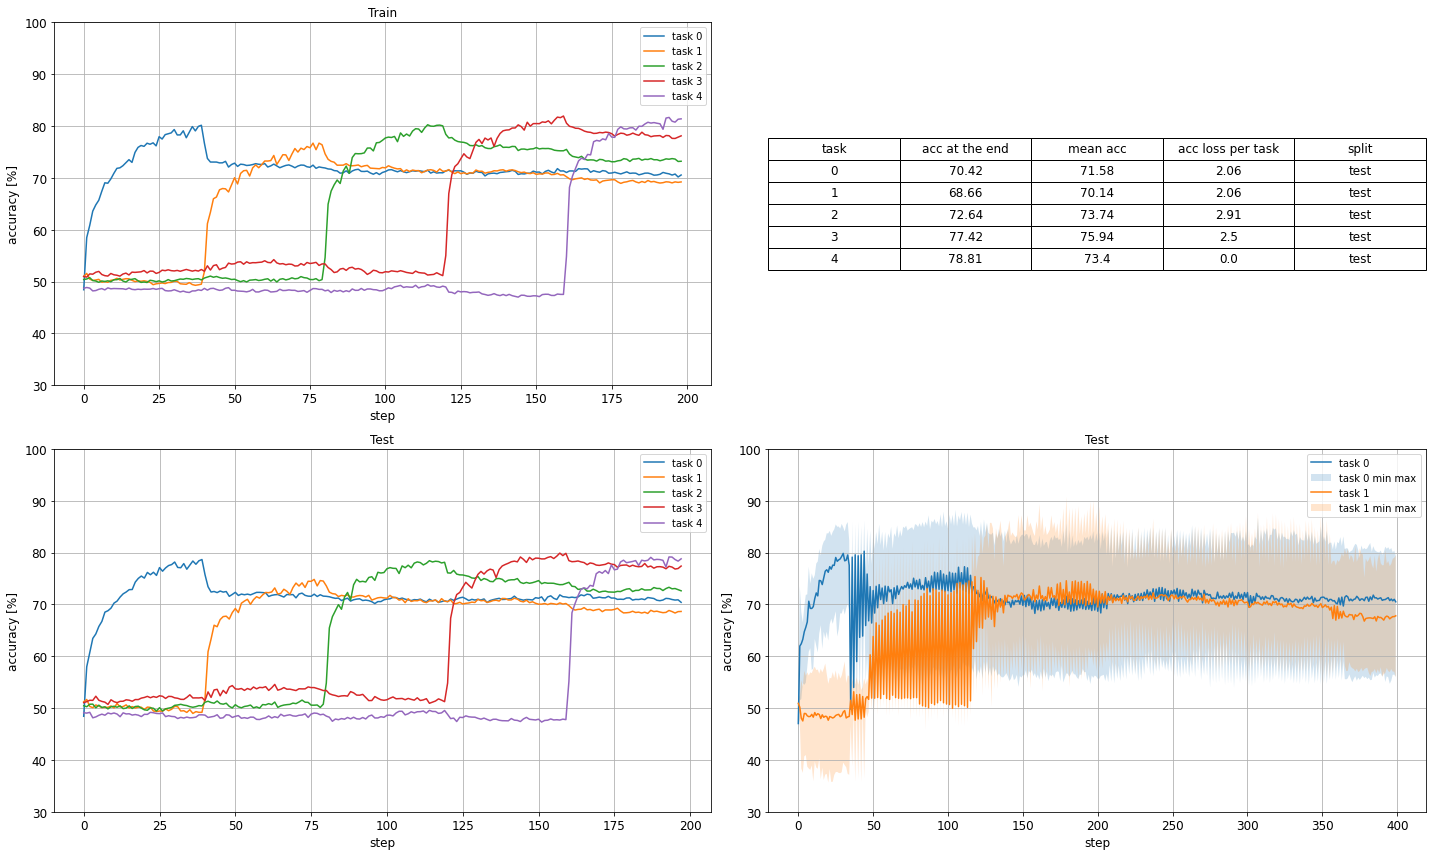

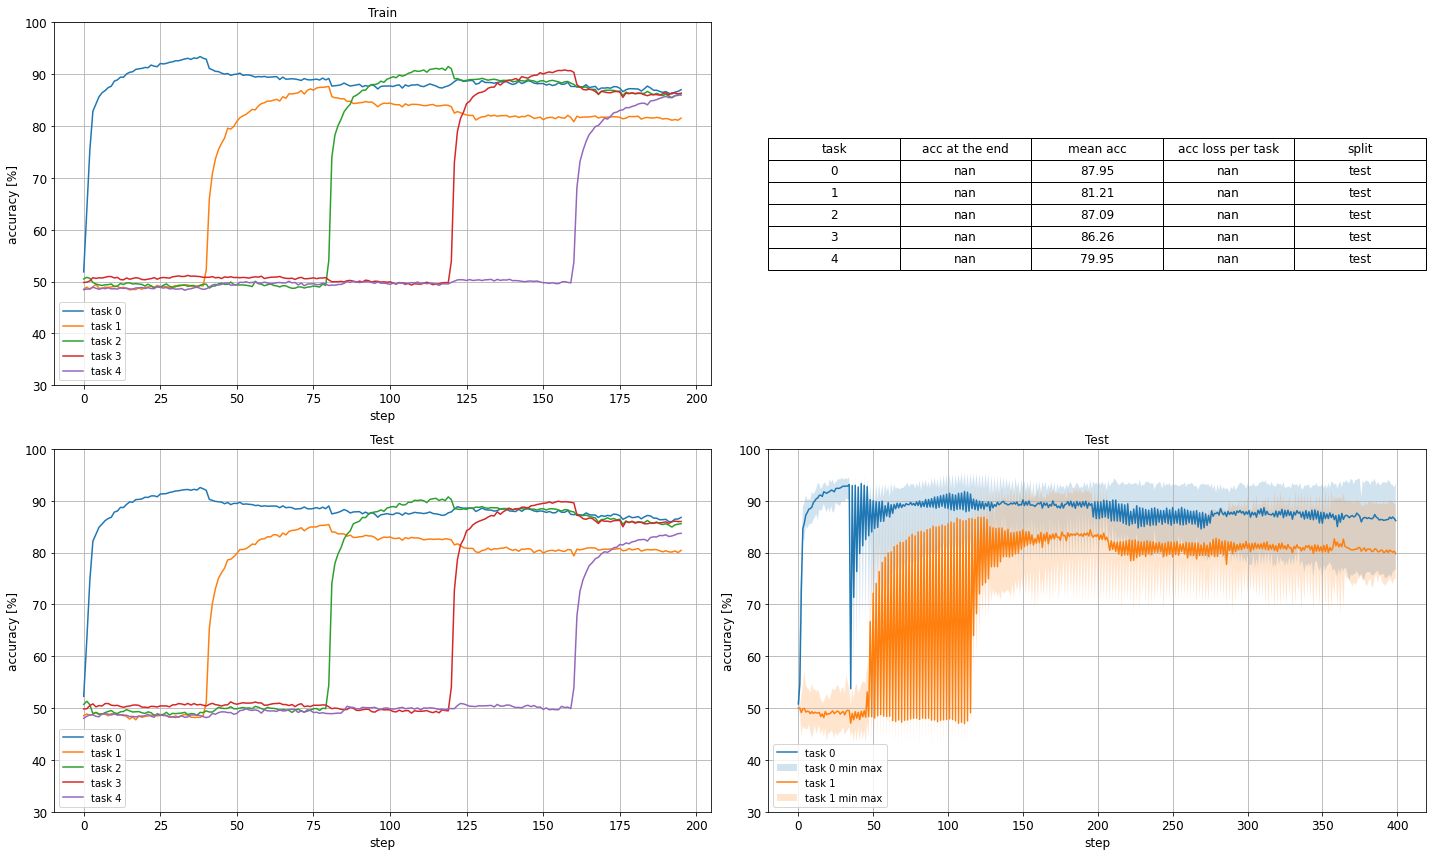

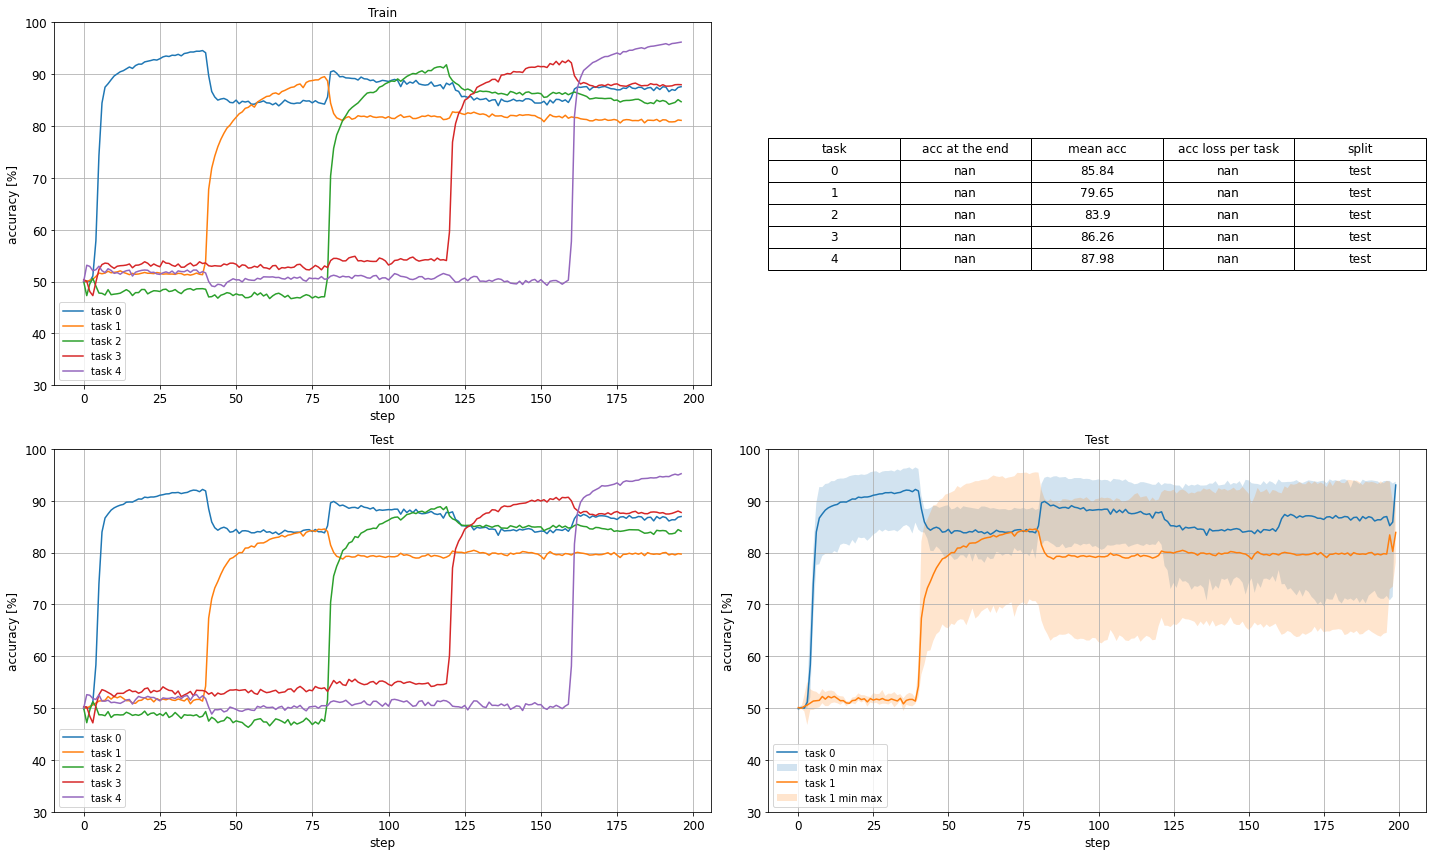

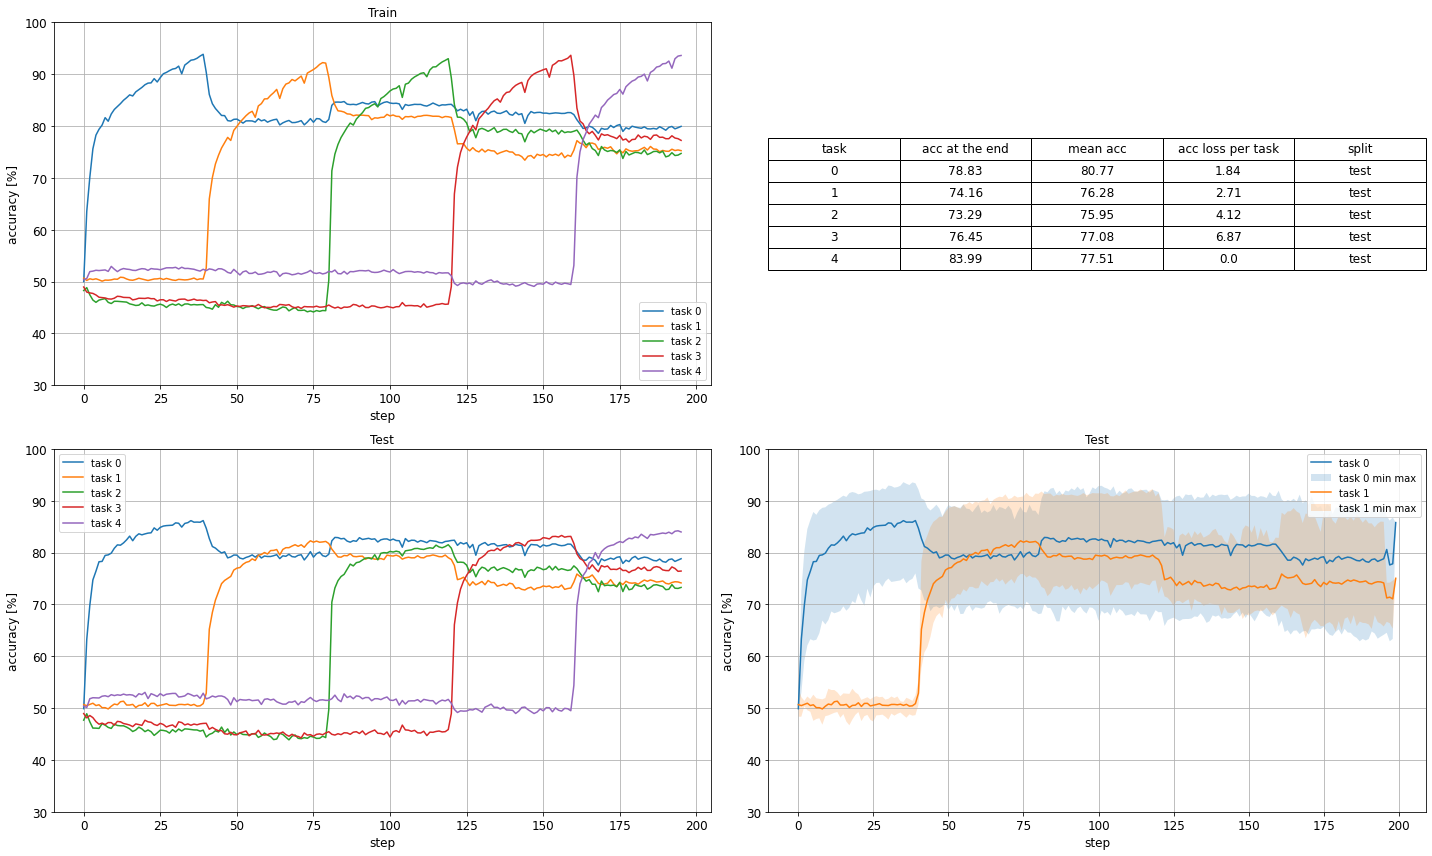

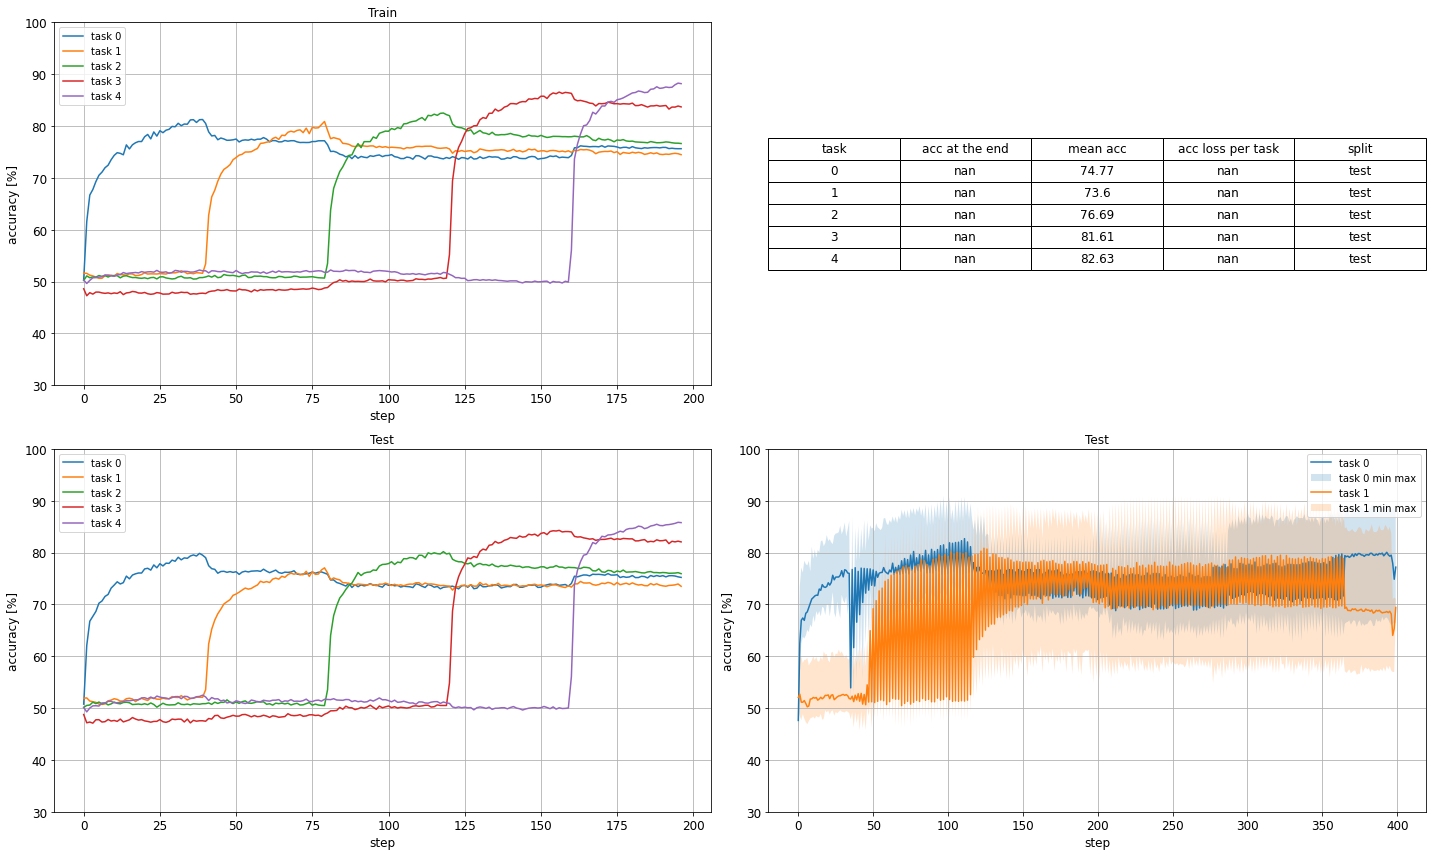

In [6]:
viz.plot_everything()